In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import pandas as pd

cols = ['Tweet ID', 'Entity', 'Sentiment', 'Tweet Content']
file_path = r"C:\Users\ADMINI\Desktop\twitter_training.csv"

# Load the dataset with specified encoding
train = pd.read_csv(file_path, encoding='latin1', usecols=cols)

# Display the first few rows of the dataframe
train.head()


,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
train.shape

(74682, 4)

In [5]:
# Display basic information about the dataframe
train.info()

# Display summary statistics
train.describe()

# Check for missing values
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64

In [8]:
train['Sentiment'].unique()
train.isnull().sum()

Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64

In [9]:
train.dropna(inplace=True)

In [10]:
train.duplicated().sum()

2341

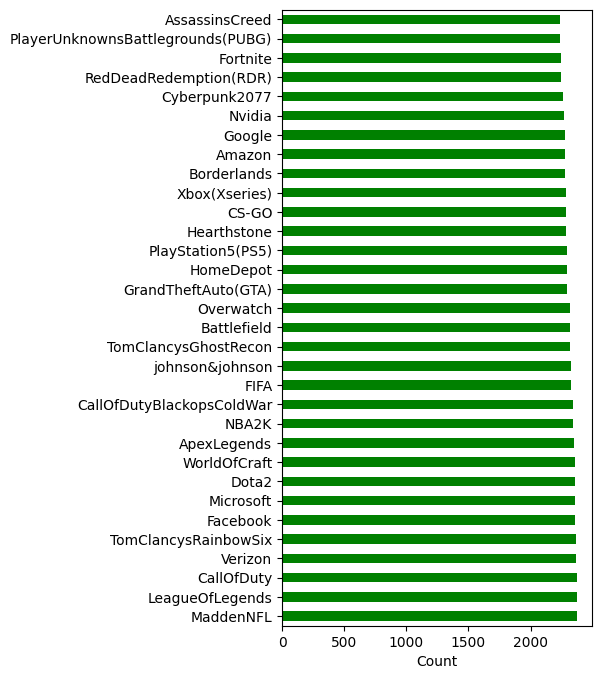

In [15]:
plt.figure(figsize=(4,8))
train['Entity'].value_counts().plot(kind='barh',color='g')
plt.xlabel("Count")
plt.show()

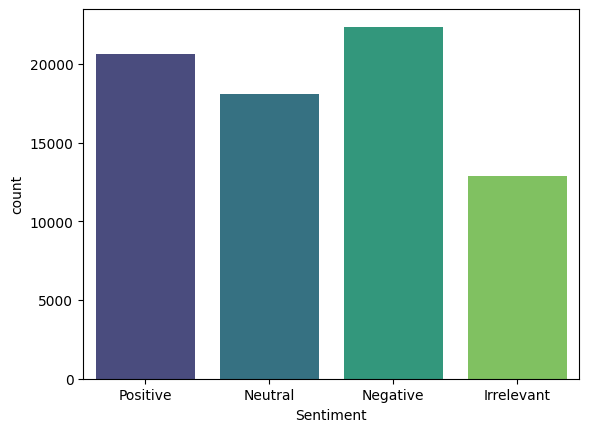

In [16]:
sns.countplot(x = 'Sentiment',data=train,palette='viridis')
plt.show()

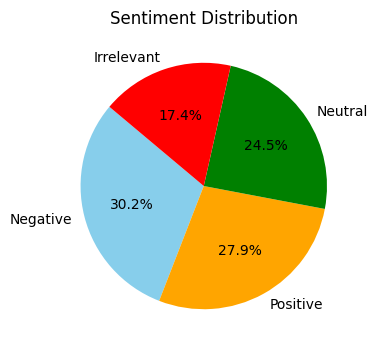

In [20]:
# Calculate the counts for each sentiment
sentiment_counts = train['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

In [21]:
train

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


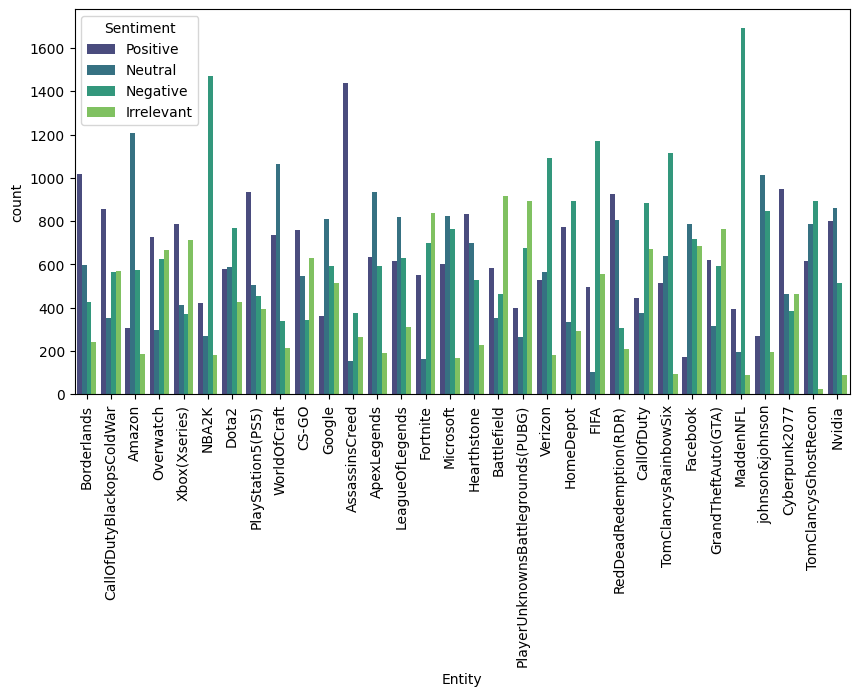

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='Entity',data=train,palette='viridis',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [4]:
import pandas as pd

# Load the dataset
cols = ['Tweet ID', 'Entity', 'Sentiment', 'Tweet Content']
file_path = r"C:\Users\ADMINI\Desktop\twitter_training.csv"
train = pd.read_csv(file_path, encoding='latin1', usecols=cols)


# Step 1: Group by Entity and Sentiment
entity_wise_sentiment = train.groupby(["Entity", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Entities
entity_counts = train['Entity'].value_counts().nlargest(5).index
top_entities_sentiment = entity_wise_sentiment[entity_wise_sentiment['Entity'].isin(entity_counts)]

# Step 3: Select only the desired columns
desired_columns = ['Tweet ID', 'Entity', 'Sentiment', 'Tweet Content']
selected_data = train[desired_columns]

# Step 4: Filter the selected data by top entities
filtered_selected_data = selected_data[selected_data['Entity'].isin(entity_counts)]

# Print or use the resulting DataFrame
print(filtered_selected_data.head())


       Tweet ID           Entity Sentiment             Tweet Content
30258      7201  LeagueOfLegends   Neutral     Check out my video!  
30259      7201  LeagueOfLegends   Neutral  Take a look at my video!
30260      7201  LeagueOfLegends   Neutral           Watch my video!
30261      7201  LeagueOfLegends   Neutral      Check out our video!
30262      7201  LeagueOfLegends   Neutral   Check for out my video!


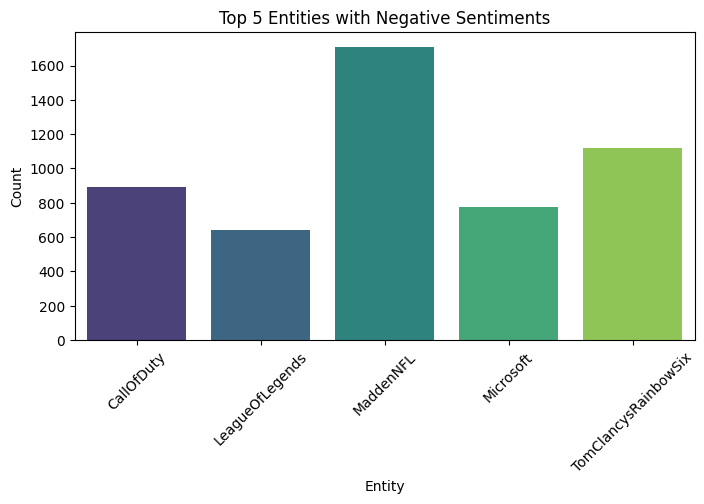

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
entity_wise_sentiment = train.groupby(["Entity", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Entities
entity_counts = train['Entity'].value_counts().nlargest(5).index
top_entities_sentiment = entity_wise_sentiment[entity_wise_sentiment['Entity'].isin(entity_counts)]

# Plot the data
plt.figure(figsize=(8, 4))
sns.barplot(data=top_entities_sentiment[top_entities_sentiment['Sentiment'] == 'Negative'], 
            x='Entity', y='Count', palette='viridis')
plt.title('Top 5 Entities with Negative Sentiments')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

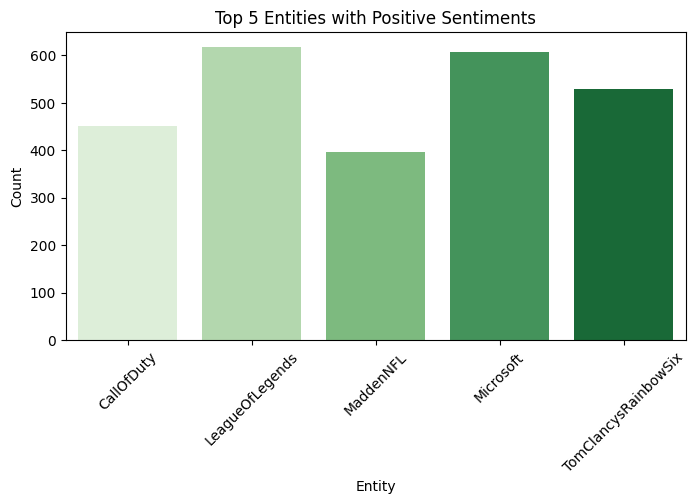

In [9]:
plt.figure(figsize=(8, 4))
sns.barplot(data=top_entities_sentiment[top_entities_sentiment['Sentiment'] == 'Positive'], 
            x='Entity', y='Count', palette='Greens')
plt.title('Top 5 Entities with Positive Sentiments')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

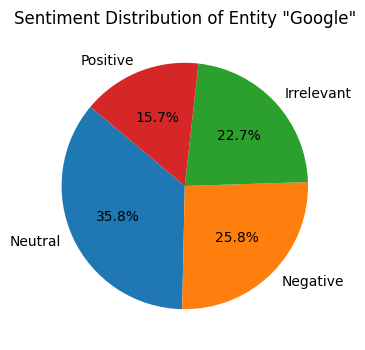

In [11]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = train[train['Entity'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Entity "Google"')
plt.show()

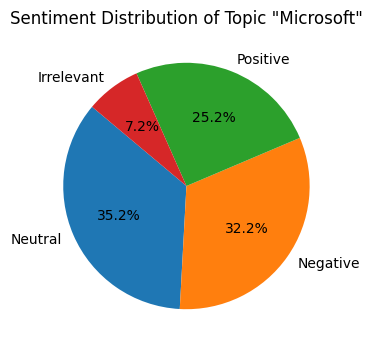

In [12]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = train[train['Entity'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

In [18]:
train['Tweet Content'] = train['Tweet Content'].fillna('').astype(str)

# Step 1: Add a new column for message length
train['msg_len'] = train['Tweet Content'].apply(len)

# Step 2: Group by Entity and Sentiment
entity_wise_sentiment = train.groupby(["Entity", "Sentiment"]).size().reset_index(name='Count')

entity_counts = train['Entity'].value_counts().nlargest(5).index
top_entities_sentiment = entity_wise_sentiment[entity_wise_sentiment['Entity'].isin(entity_counts)]

In [19]:
train

,Tweet ID,Entity,Sentiment,Tweet Content,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,127
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,161


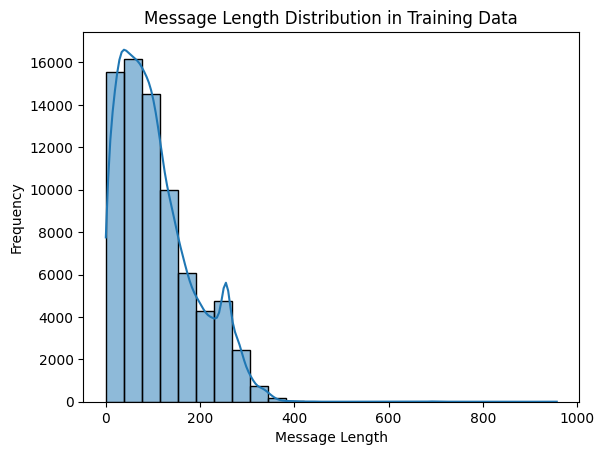

In [21]:
sns.histplot(train['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()